# Python for Finance 

 This program will show you how t compute: 
 * portfolio simple returns;
 * get daily returns and volatility

In [1]:
# Import the libraries
import datetime
from datetime import datetime
import numpy as np
import pandas as pd 
import pandas_datareader as web
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

Big Tech,also known as the Tech Giants, Big Four, or Big Five is a name given to the four or five largest and most dominant companies in the information technology industry of the United States—namely Amazon, Apple, Google (Alphabet), Facebook, and Microsoft. These companies have been among the most valuable public companies globally, each having had a maximum market capitalization ranging from around 1 trillion to around 2 trillion USD.

In [2]:
# Create a fictional portfolio 
# Get stock samples for the portfolio 
# FAANG 
stockSymbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# Get the stock starting data
stockStartDate = '2013-01-01'
# FB does not have an APO before this data. For this reason we use this date as initial data

In [4]:
# Get todays data and format it in the format yyyy-mm-dd
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2021-09-27


In [5]:
# Get the number of assets in the portfolio

numAssets = len(stockSymbols)
print('You have ' + str(numAssets) + ' assets in your portfolio')

You have 5 assets in your portfolio


In [6]:
# Create a function to get stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close'): # because we want the adjusted close price for the stocks
    data = web.DataReader(stocks, data_source = 'yahoo', start = start, end = end)[col]
    return data

In [7]:
# Get the portfolio adj close price 
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.985447,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.771053,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.303900,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.207998,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.251616,13.880000,365.280823
...,...,...,...,...,...
2021-09-21,357.480011,3343.629883,143.429993,573.140015,2792.929932
2021-09-22,343.209991,3380.050049,145.850006,590.650024,2818.770020
2021-09-23,345.959991,3416.000000,146.830002,593.260010,2836.530029


All the prices for the examined stocks have increased

In [8]:
# Create a function to visualize the portfolio
def showGraph(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close'):
    
    # Create a title for the portfolio
    title = 'Portfolio '+ col + ' price history'
    
    # Get the stocks 
    my_stocks = getMyPortfolio(stocks = stocks, start = start, end = end, col = col)
    
    # Give the figure size 
    plt.figure(figsize= (12.2, 4.5))
    
    # Loop through each stock and plot the price
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label = c)
    
    # Addign visual elements
    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col + ' price USD ($)', fontsize = 18)
    plt.legend(my_stocks.columns.values, loc = 'upper left')
    plt.show()

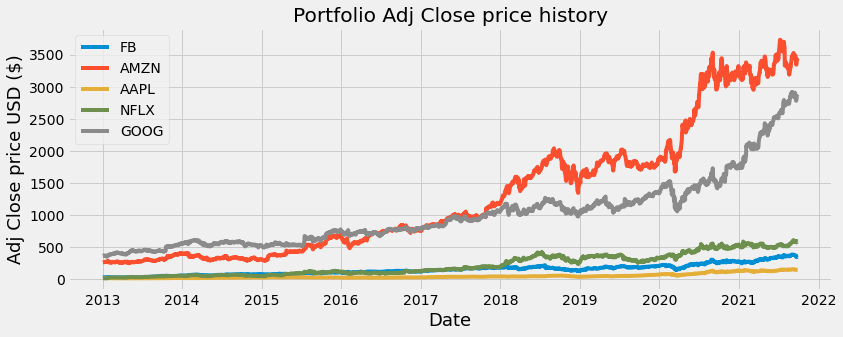

In [9]:
# Show adjusted close price for FAANG
showGraph(stockSymbols)

In [10]:
# Calculate the simple returns 
# take new price/ old price -1
daily_simple_returns = my_stocks.pct_change(1) #1 for one day    

# Show daily_simple_returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-09-21,0.005004,-0.003606,0.003428,-0.003980,0.004528
2021-09-22,-0.039918,0.010892,0.016872,0.030551,0.009252
2021-09-23,0.008013,0.010636,0.006719,0.004419,0.006301


In [11]:
# Show the stock correlation 
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.521839,0.459756,0.361045,0.571438
AMZN,0.521839,1.000000,0.462521,0.452940,0.602852
AAPL,0.459756,0.462521,1.000000,0.276881,0.527428
NFLX,0.361045,0.452940,0.276881,1.000000,0.415104
GOOG,0.571438,0.602852,0.527428,0.415104,1.000000


In [13]:
#Show the covariancfe matrix for simple returns 
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000459,0.000212,0.000176,0.000219,0.000197
AMZN,0.000212,0.000361,0.000157,0.000244,0.000184
AAPL,0.000176,0.000157,0.000319,0.000140,0.000151
NFLX,0.000219,0.000244,0.000140,0.000803,0.000189
GOOG,0.000197,0.000184,0.000151,0.000189,0.000258


On the diagola we have the variances. 
The higher the variance the higher is the risk and the higher is the volatility and the return. 

In the other cells there are the covariances.
Efficient fronteer -> the set of optimum portoflios that:
* offers the highest level of return for a fixed level or risk 
* offers the lowest risk for a fixed level of return

Efficient fronteer tries to optimize the maximum return vs the degree of risk for the overall portfolio and all the assets in the portfolio

In [14]:
# Show the variance (without the covariance matrix)
daily_simple_returns.var()

Symbols
FB      0.000459
AMZN    0.000361
AAPL    0.000319
NFLX    0.000803
GOOG    0.000258
dtype: float64

In [15]:
#Print the standard deviation for daily simple returns (Stock volatility)
print('Stock Volatility:')
daily_simple_returns.std()


Stock Volatility:


Symbols
FB      0.021421
AMZN    0.019000
AAPL    0.017851
NFLX    0.028341
GOOG    0.016068
dtype: float64

We can see that the most volatile stock is Netflix and the least volatile is Google  


REMEMBER THE HIGHER THE VOLATILITY THE HIGHER IS THE RETURN 


Thus we expect a lower return of Google compared to N4etflix

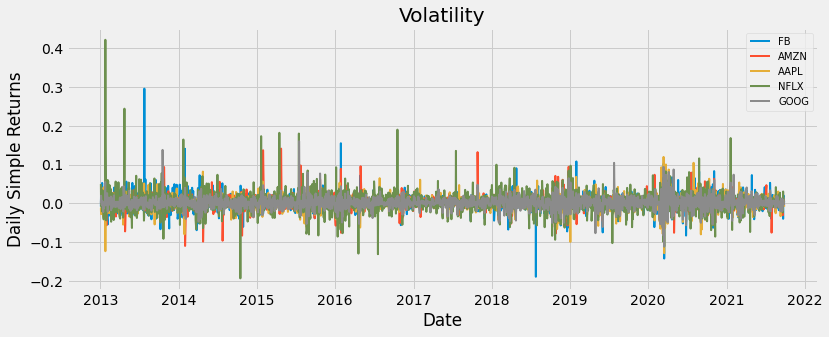

In [16]:
# Visualize the stocks daily simple return/ volatility
plt.figure(figsize = (12, 4.5))

#Loop through each stock and plot the simple return
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns[c], lw = 2, label = c)

# Create a legend
plt.legend(loc = 'upper right', fontsize = 10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show()


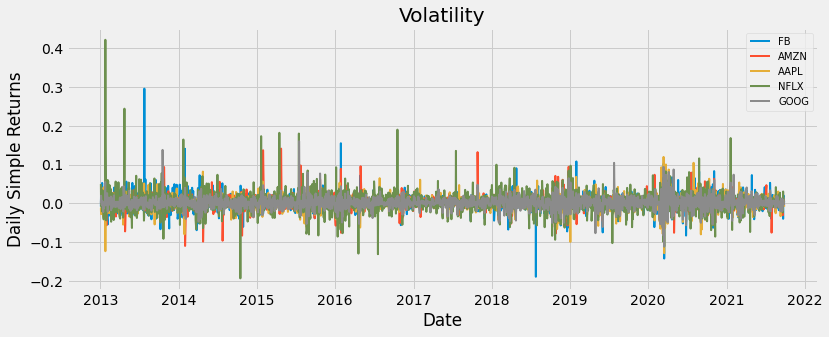

In [18]:
# Visualize the stocks daily simple return/ volatility
plt.figure(figsize = (12, 4.5))

#Loop through each stock and plot the simple return
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index,daily_simple_returns[c] ,lw = 2, label = c)

# Create a legend
plt.legend(loc = 'upper right', fontsize = 10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show()

Facebook and netflix are quite volatile. 



In [19]:
# Show the mean of the daily simple return 
dailyMeanSimplereturn = daily_simple_returns.mean()

In [22]:
print('Daily mean simple returns')
print(dailyMeanSimplereturn)

Daily mean simple returns
Symbols
FB      0.001381
AMZN    0.001355
AAPL    0.001137
NFLX    0.002120
GOOG    0.001067
dtype: float64


The highest return is for Netflix and the lowest is the one of Google. This is coherent with the data regarding the volatility

In [24]:
#Calculate the expected portfolio daily return 
randomweights = np.array([0.4,0.1,0.3,0.1,0.1]) #40% FB, 10% Amazon, 30% Apple, 10% Netflix, 10% Google

portfolioSimpleReturn = np.sum(dailyMeanSimplereturn*randomweights)

# Print the expected portofolio return 
print('The dialy expected portfolio return is ' + str(portfolioSimpleReturn))

The dialy expected portfolio return is 0.001347556810012669


In [25]:
# Get the yearly sample return 
print('Expected annualised portfolio simple return: ' + str(portfolioSimpleReturn * 253)) #253 number of trading days 

Expected annualised portfolio simple return: 0.34093187293320526


In [26]:
# Calculate the growth of the investment 
# Calculate the total return (cumulatives return) - Daily comulative simple return 
dailyCumulSimplReturn  = (daily_simple_returns + 1).cumprod()

# Show the cumulative simple returns

dailyCumulSimplReturn


Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954229,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2021-09-21,12.767143,12.994559,8.444287,43.603738,7.752226
2021-09-22,12.257500,13.136101,8.586763,44.935877,7.823949
2021-09-23,12.355714,13.275815,8.644459,45.134441,7.873245


_How to calculate daily cumulative simple return_


(period_1 + 1) * (period_2 + 1) * .. * (period_n + 1)

In [27]:
(daily_simple_returns['GOOG'][1] + 1) * (daily_simple_returns['GOOG'][2] + 1)

1.0203525854692204

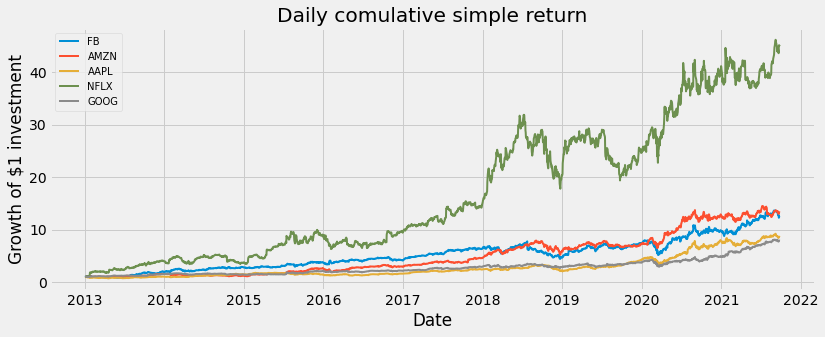

In [29]:
# Let's visualize the daily comulative simple returns 

plt.figure(figsize= (12.2, 4.5))
for c in dailyCumulSimplReturn.columns.values:
    plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw = 2, label = c)
    
plt.legend(loc= 'upper left', fontsize = 10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily comulative simple return')
plt.show()